In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
df=pd.read_csv("/content/USA_Housing (1).csv")

In [ ]:
df.shape

(5000, 7)

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


1.Distribution plots 1.1 histogram plot 1.1 kde plot

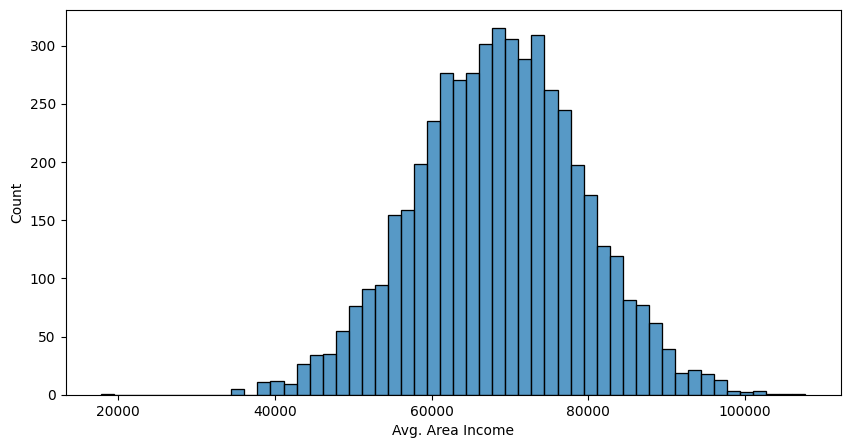

In [ ]:
sns.histplot(df["Avg. Area Income"],kde=False)
plt.show()

The hist plot shows that average area income is between 60000 to 80000 peak at approximately 70000

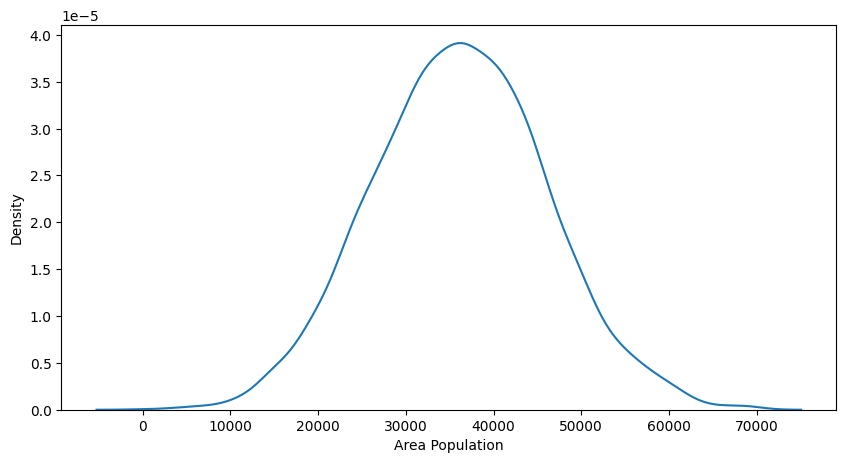

In [ ]:
sns.distplot(df['Area Population'],hist=False)
plt.show()

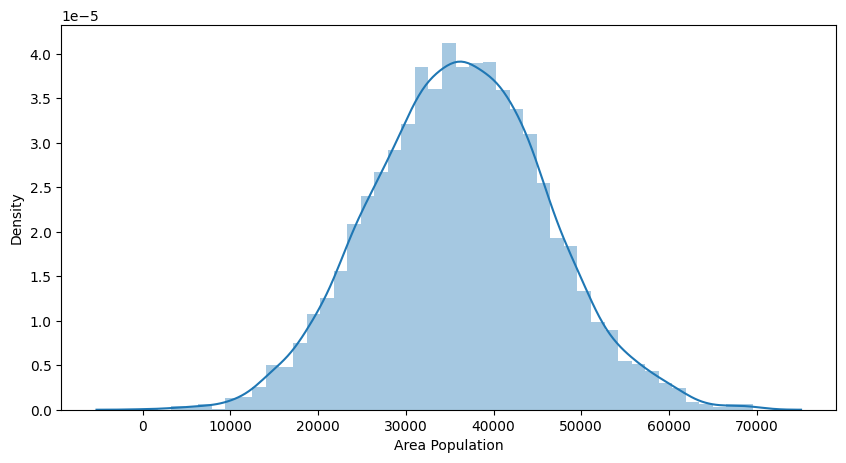

In [ ]:
sns.distplot(df['Area Population'])
plt.show()

The following kde plot shows that most of the ares contain population in between 30000-40000.

2. relationl plots

2.1 line plot

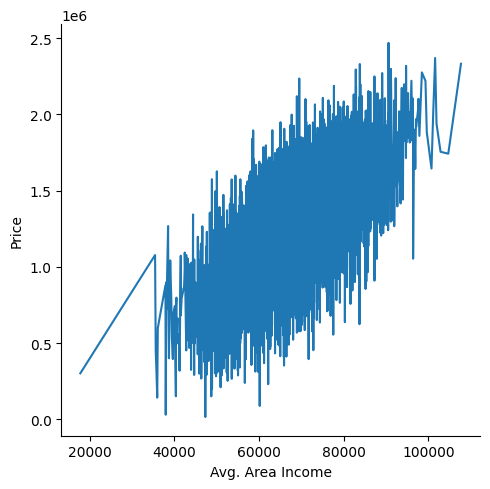

In [ ]:
sns.relplot(x="Avg. Area Income",y="Price",data=df,kind="line")
plt.show()

The line plot shows that relation between houses prices   and average area income is not very strong and not weak approximately 0.65 so increase in avg.area income roughly increases prices.

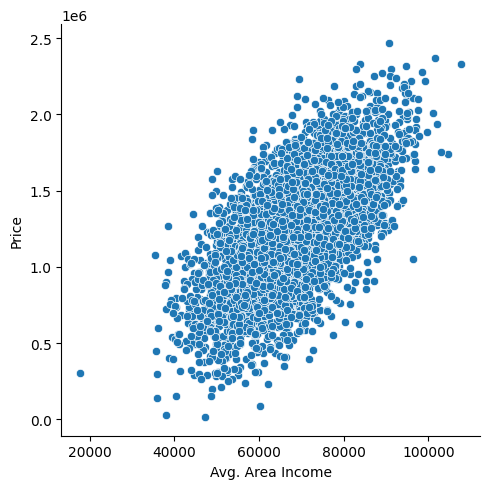

In [ ]:
sns.relplot(x="Avg. Area Income",y="Price",data=df,kind="scatter")

plt.show()

The line and scatter plot shows that relation between houses prices   and average area income is not very strong and not weak approximately 0.65 so increase in avg.area income roughly increases prices.

3.Categorical data

3.1 Barplot

Traditioal boxplot and violin plot require one categorical and one numerical feature .However, if both variables are numerical, you can still use these plots, but you need to create categories or groups for one of the numerical features to effectively use it. In the given data features contain floating point numbers that are difficult to categorize


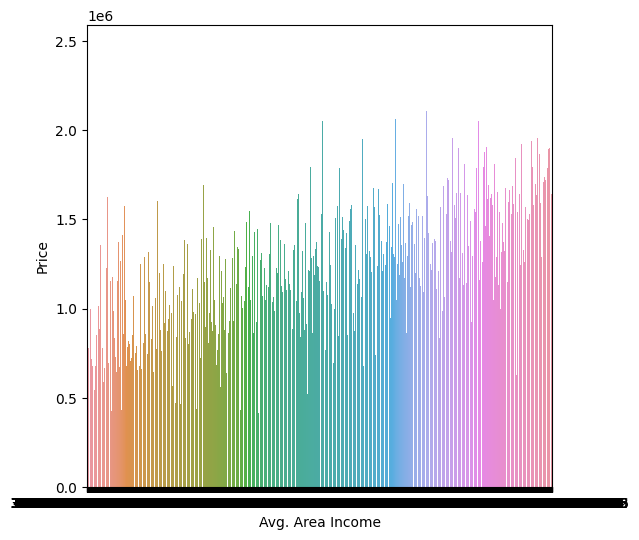

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x="Avg. Area Income",y="Price",data=df)
plt.show()

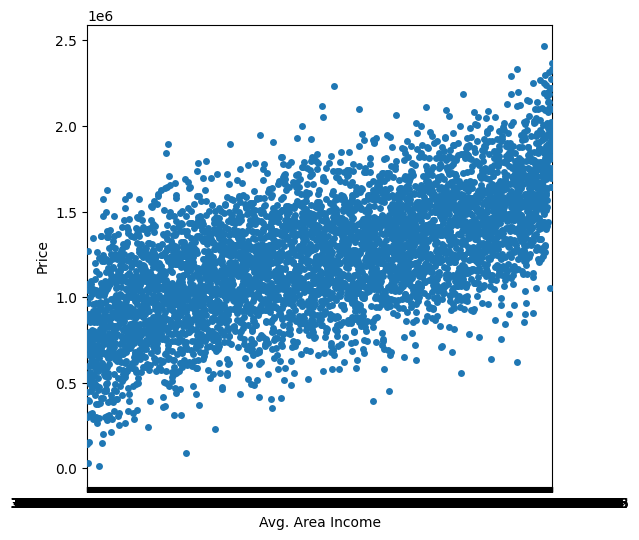

In [ ]:
plt.figure(figsize=(6,6))
sns.stripplot(x="Avg. Area Income",y="Price",data=df)
plt.show()

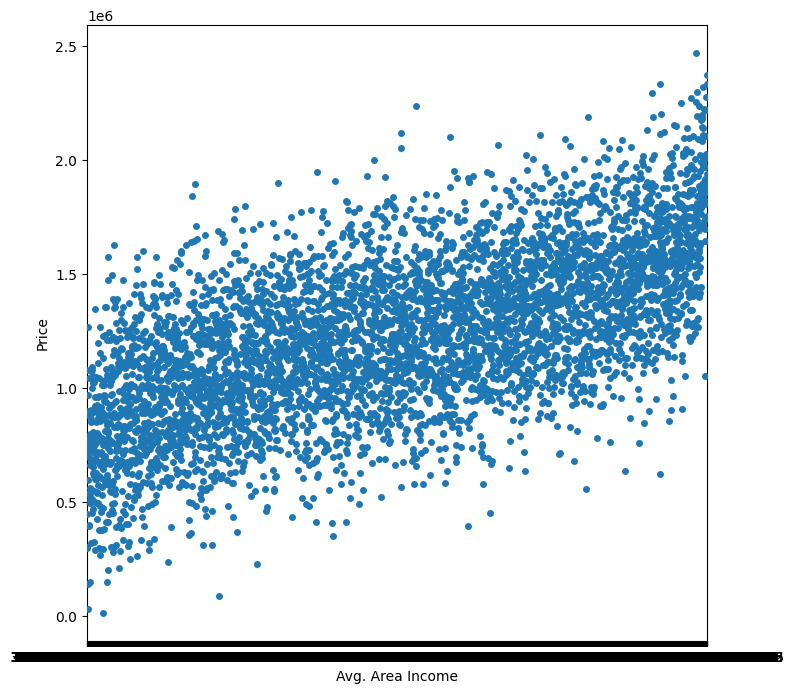

In [ ]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Avg. Area Income",y="Price",data=df)
plt.show()

Unable to find any pattern in the above graphs

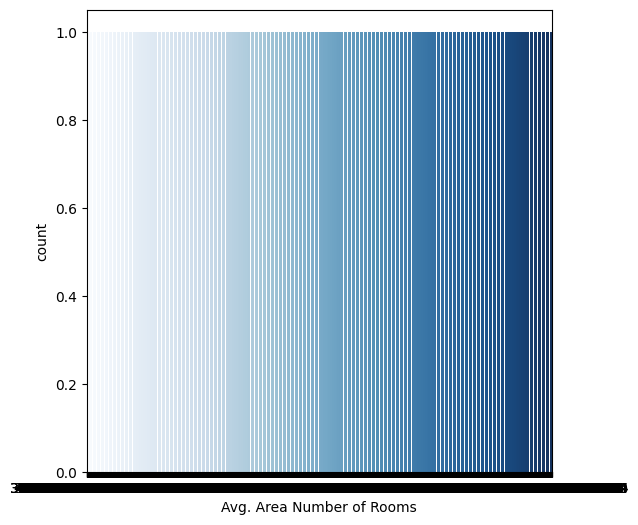

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="Avg. Area Number of Rooms",data=df,palette="Blues");
plt.show()

As the feature number of rooms are in floating points so it forms like a continuous graph

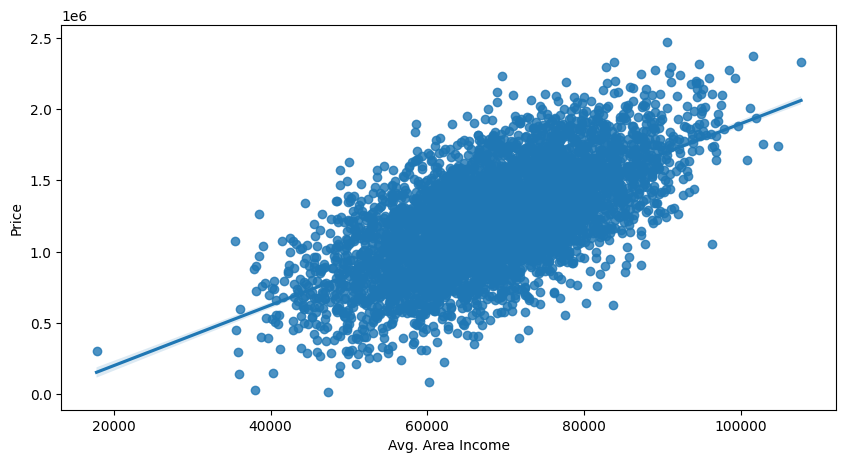

In [ ]:
sns.regplot(x="Avg. Area Income", y="Price", data=df)
plt.show()

the graph shows a relation between price and area i

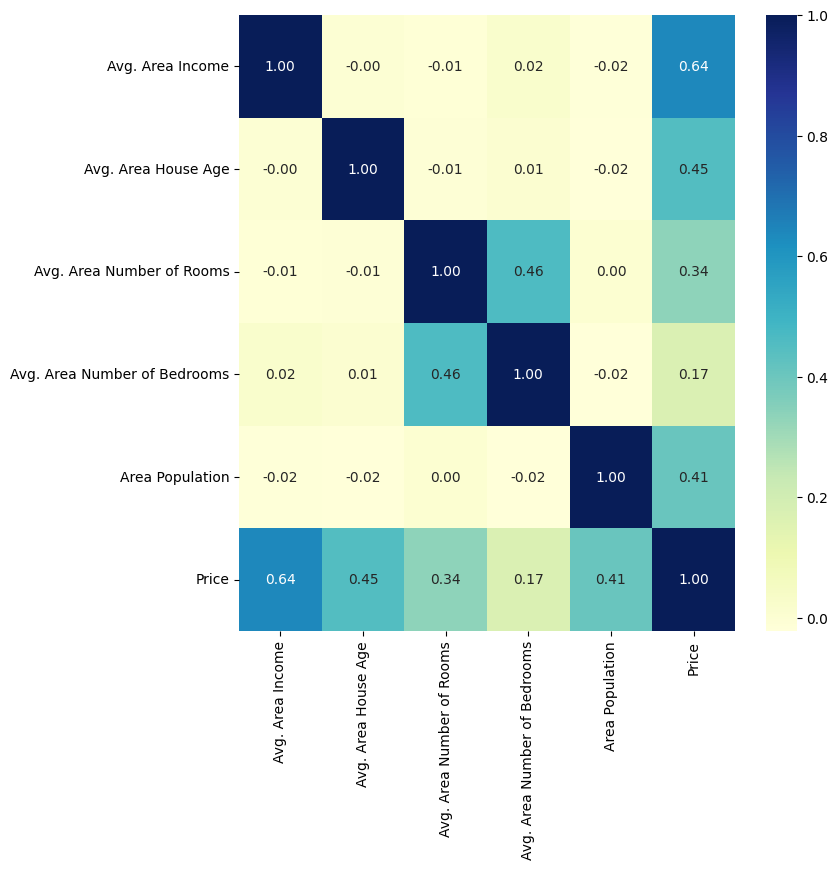

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,fmt=".2f")   # fmt= fo
plt.show()

In [ ]:
df.drop("Address",axis=1,inplace=True)

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


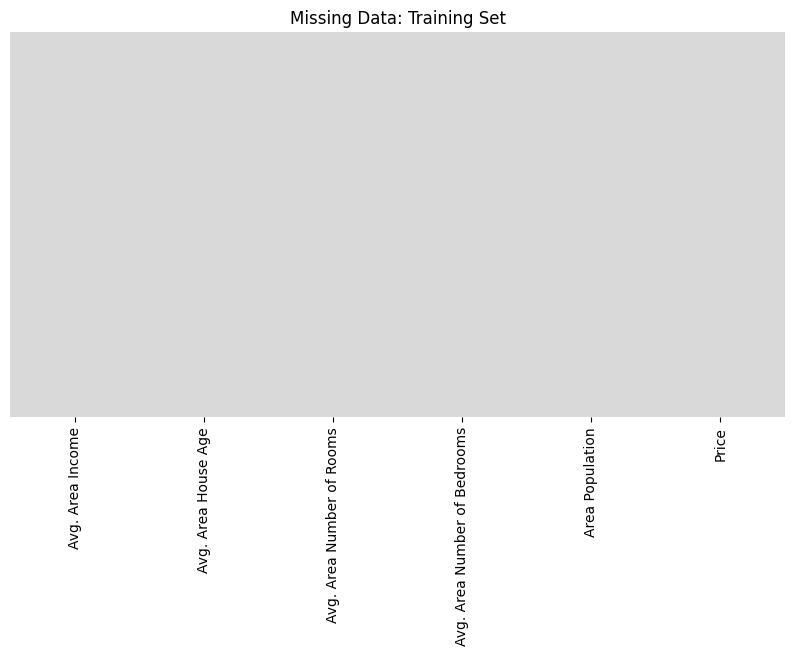

In [ ]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('Price', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = df['Price'] # y is the column we're trying to predict

In [ ]:
x.shape

(5000, 5)

In [ ]:
y.shape

(5000,)

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [ ]:
x_train.shape
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [ ]:
y_train.shape
y_train

3413    1.305210e+06
1610    1.400961e+06
3459    1.048640e+06
4293    1.231157e+06
1039    1.391233e+06
            ...     
4171    7.296417e+05
599     1.599479e+06
1361    1.102641e+06
1547    8.650995e+05
4959    2.108376e+06
Name: Price, Length: 4000, dtype: float64

In [ ]:
x_test.shape

(1000, 5)

In [ ]:
y_test.shape

(1000,)

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predictd
y_pred=lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(1000,)
[1257919.729097    822112.41884197 1740669.05865495  972452.12917494
  993422.26329315  644126.07414456 1073911.79101682  856584.00194133
 1445318.25518365 1204342.19071175 1455792.46212863 1298556.65696433
 1735924.33836095 1336925.7757779  1387637.43231922 1222403.77772069
  613786.28691982  963933.54416267 1221197.33050139 1198071.57563599
  505861.89531673 1769106.54723353 1853881.16842511 1200369.50507868
 1065129.1285072  1812033.73067313 1768686.47091262 1439920.83814323
 1387251.99649376 1541178.39224181  726418.80504278 1754497.60908688
 1462185.72653198 1025600.16081145 1284926.8685155   917454.59590853
 1187046.94956865  999330.91117488 1329536.63409595  782191.60441437
 1393272.03053841  578216.88394851  822643.37151048 1895533.11413226
 1672019.8489204   966926.45434583 1129674.55638146  792797.75914663
 1161057.18412143 1472396.71417164 1457656.70412313 1162939.334229
 1099453.68110992 1358107.44619413  841103.70380593  986322.30573616
 1123323.53002134 1253538.63

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
    1251688.62 |    1257919.73
     873048.32 |     822112.42
    1696977.66 |    1740669.06
    1063964.29 |     972452.13
     948788.28 |     993422.26
     730043.65 |     644126.07
    1166925.15 |    1073911.79
     705444.12 |     856584.00
    1499988.88 |    1445318.26
    1288199.15 |    1204342.19
    1441736.76 |    1455792.46
    1279681.15 |    1298556.66
    1754969.16 |    1735924.34
    1511653.45 |    1336925.78
    1441956.20 |    1387637.43
    1119992.62 |    1222403.78
     727866.53 |     613786.29
    1138885.10 |     963933.54
    1074263.32 |    1221197.33
    1386473.37 |    1198071.58
     404643.60 |     505861.90
    1449829.49 |    1769106.55
    1775874.76 |    1853881.17
    1202050.58 |    1200369.51
    1105737.46 |    1065129.13
    1835564.69 |    1812033.73
    1795428.77 |    1768686.47
    1424283.37 |    1439920.84
    1365945.08 |    1387252.00
    1492011.50 |    1541178.39
     

In [ ]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-6.97228472e+04  3.66084463e+05 -5.52472177e+05  2.15744753e+05
  1.94774619e+05  5.44070808e+05  1.14285091e+05  3.31612880e+05
 -2.57121373e+05 -1.61453088e+04 -2.67595580e+05 -1.10359775e+05
 -5.47727456e+05 -1.48728894e+05 -1.99440550e+05 -3.42068958e+04
  5.74410595e+05  2.24263338e+05 -3.30004486e+04 -9.87469372e+03
  6.82334987e+05 -5.80909665e+05 -6.65684287e+05 -1.21726232e+04
  1.23067753e+05 -6.23836849e+05 -5.80489589e+05 -2.51723956e+05
 -1.99055115e+05 -3.52981510e+05  4.61778077e+05 -5.66300727e+05
 -2.73988845e+05  1.62596721e+05 -9.67299866e+04  2.70742286e+05
  1.14993234e+03  1.88865971e+05 -1.41339752e+05  4.06005277e+05
 -2.05075149e+05  6.09979998e+05  3.65553510e+05 -7.07336232e+05
 -4.83822967e+05  2.21270428e+05  5.85223255e+04  3.95399123e+05
  2.71396978e+04 -2.84199832e+05 -2.69459822e+05  2.52575477e+04
  8.87432008e+04 -1.69910564e+05  3.47093178e+05  2.01874576e+05
  6.48733519e+04 -6.53417504e+04 -2.40082781e+05  6.89093673e+05
 -2.74620202e+05  7.94525

<Axes: ylabel='Density'>

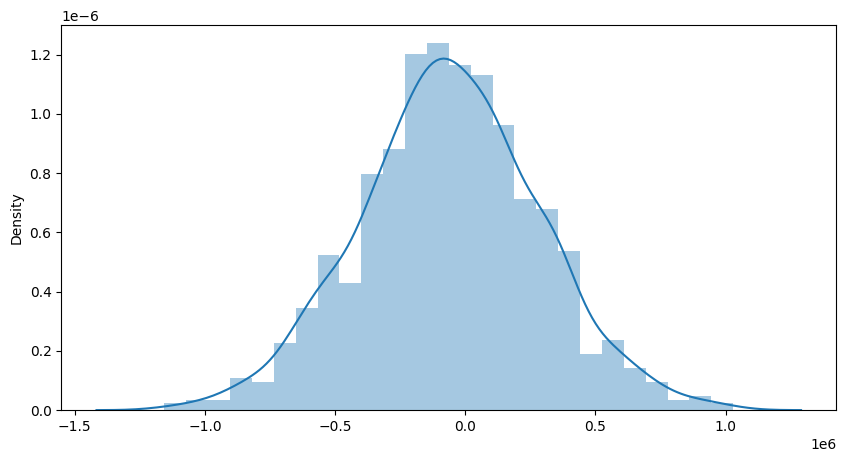

In [ ]:
sns.distplot(residual, kde=True)

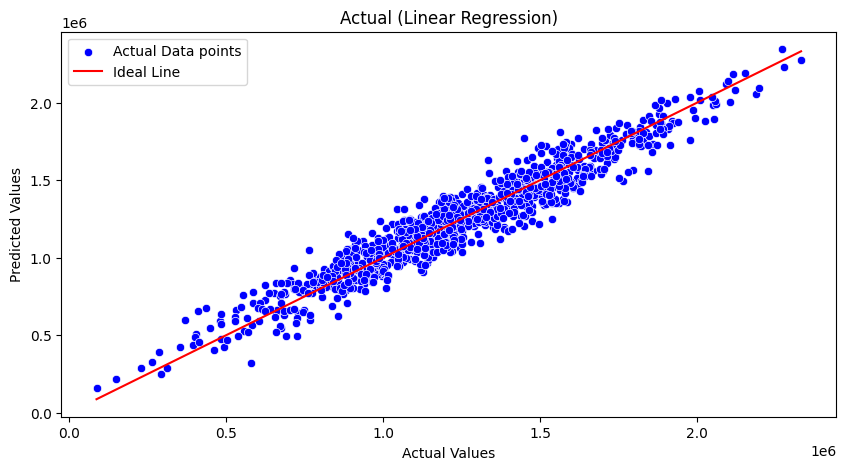

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 10100187858.864885
Root Mean Squared Error: 100499.69083964829


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  31929264705.95889


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  15044033143.608986


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  12399268703.032248


In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 10100187858.864885 ,
    "Descison Tree": 31347567651.181007 ,
    "Random Forest":  15016132407.38663,
    "Gradient Boosting": 12399201784.522278

}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("model rankings without feature scalling")

print("Model Rankings (lower values are better):")

for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

model rankings without feature scalling
Model Rankings (lower values are better):
1. Linear Regression: 10100187858.864885
2. Gradient Boosting: 12399201784.522278
3. Random Forest: 15016132407.38663
4. Descison Tree: 31347567651.181007


Feature Scalling

In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)


In [ ]:

x_transform.shape
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

Using Feature Scaling only without Target variable scalling

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(500,)
[1257098.09685349  822086.76211938 1739484.60206384  973128.9269703
  993918.45735573  645734.60078803 1074412.81648685  856463.98369062
 1445048.63352694 1201847.71924782 1454475.51805013 1296582.98910134
 1736858.04511704 1336694.59015483 1386280.00636484 1223122.34992068
  615840.78603611  964515.62334817 1222020.63802963 1197532.31828304
  506756.96702134 1767894.37065039 1854829.42630351 1198521.37525139
 1065384.60130188 1810199.62960618 1767830.26189968 1440162.9747667
 1386122.51652193 1539972.94909227  729561.93190619 1754434.69364763
 1465273.07428251 1026021.79840116 1283514.57970667  917688.32850804
 1185681.03610736 1000137.89595728 1329344.79847155  784262.29954368
 1392528.47637802  576569.30274928  823465.14446257 1893895.24014477
 1671565.73974773  964720.06183539 1129280.90868273  792574.96874635
 1159381.43948676 1473209.24685792 1459527.31772498 1164492.85979007
 1098752.99065475 1360158.14296951  843194.09463543  985298.51640372
 1123531.58586396 1252412.096

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
    1251688.62 |    1257098.10
     873048.32 |     822086.76
    1696977.66 |    1739484.60
    1063964.29 |     973128.93
     948788.28 |     993918.46
     730043.65 |     645734.60
    1166925.15 |    1074412.82
     705444.12 |     856463.98
    1499988.88 |    1445048.63
    1288199.15 |    1201847.72
    1441736.76 |    1454475.52
    1279681.15 |    1296582.99
    1754969.16 |    1736858.05
    1511653.45 |    1336694.59
    1441956.20 |    1386280.01
    1119992.62 |    1223122.35
     727866.53 |     615840.79
    1138885.10 |     964515.62
    1074263.32 |    1222020.64
    1386473.37 |    1197532.32
     404643.60 |     506756.97
    1449829.49 |    1767894.37
    1775874.76 |    1854829.43
    1202050.58 |    1198521.38
    1105737.46 |    1065384.60
    1835564.69 |    1810199.63
    1795428.77 |    1767830.26
    1424283.37 |    1440162.97
    1365945.08 |    1386122.52
    1492011.50 |    1539972.95
     

In [ ]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-4.47976991e+05 -1.29656563e+04 -9.30363496e+05 -1.64007821e+05
 -1.84797352e+05  1.63386505e+05 -2.65291711e+05 -4.73428778e+04
 -6.35927528e+05 -3.92726613e+05 -6.45354412e+05 -4.87461883e+05
 -9.27736939e+05 -5.27573484e+05 -5.77158901e+05 -4.14001244e+05
  1.93280320e+05 -1.55394518e+05 -4.12899532e+05 -3.88411212e+05
  3.02364139e+05 -9.58773265e+05 -1.04570832e+06 -3.89400269e+05
 -2.56263495e+05 -1.00107852e+06 -9.58709156e+05 -6.31041869e+05
 -5.77001411e+05 -7.30851843e+05  7.95591739e+04 -9.45313588e+05
 -6.56151968e+05 -2.16900693e+05 -4.74393474e+05 -1.08567223e+05
 -3.76559930e+05 -1.91016790e+05 -5.20223693e+05  2.48588063e+04
 -5.83407371e+05  2.32551803e+05 -1.43440386e+04 -1.08477413e+06
 -8.62444634e+05 -1.55598956e+05 -3.20159803e+05  1.65461371e+04
 -3.50260334e+05 -6.64088141e+05 -6.50406212e+05 -3.55371754e+05
 -2.89631885e+05 -5.51037037e+05 -3.40729888e+04 -1.76177411e+05
 -3.14410480e+05 -4.43290991e+05 -6.17494513e+05  3.09119767e+05
 -6.52248349e+05 -2.97038

<Axes: ylabel='Density'>

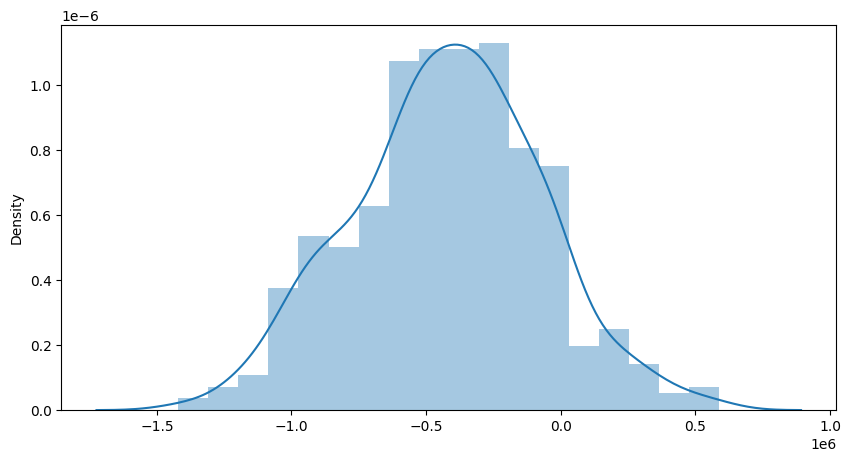

In [ ]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 9839952411.801708
Root Mean Squared Error: 99196.53427313732


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  30675263856.27061


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  14238853118.450396


In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  12081665624.080278


In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 9839952411.801708,
    "Descison Tree":  30675263856.27061,
    "Random Forest":14238853118.450396,
    "Gradient Boosting": 12081665624.080278

}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
print("without target variable scaling")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
without target variable scaling
1. Linear Regression: 9839952411.801708
2. Gradient Boosting: 12081665624.080278
3. Random Forest: 14238853118.450396
4. Descison Tree: 30675263856.27061


both Target and features transformation/scaling

In [ ]:
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

y = np.array(y).reshape(-1, 1)
pre_process = preprocessing.StandardScaler().fit(y)
y_transform = pre_process.fit_transform(y)

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_transform, test_size = .10, random_state = 101)

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(500, 1)
[[ 7.08770782e-02]
 [-1.16116236e+00]
 [ 1.43709251e+00]
 [-7.33380624e-01]
 [-6.74500500e-01]
 [-1.66062709e+00]
 [-4.46524314e-01]
 [-1.06379917e+00]
 [ 6.03190733e-01]
 [-8.56030840e-02]
 [ 6.29889563e-01]
 [ 1.82706221e-01]
 [ 1.42965357e+00]
 [ 2.96310328e-01]
 [ 4.36746182e-01]
 [-2.53490585e-02]
 [-1.74529237e+00]
 [-7.57775229e-01]
 [-2.84693278e-02]
 [-9.78251659e-02]
 [-2.05423965e+00]
 [ 1.51755468e+00]
 [ 1.76377221e+00]
 [-9.50239580e-02]
 [-4.72094032e-01]
 [ 1.63737167e+00]
 [ 1.51737311e+00]
 [ 5.89353567e-01]
 [ 4.36300139e-01]
 [ 8.72035453e-01]
 [-1.42321126e+00]
 [ 1.47943417e+00]
 [ 6.60470410e-01]
 [-5.83577393e-01]
 [ 1.45693861e-01]
 [-8.90399530e-01]
 [-1.31390376e-01]
 [-6.56885801e-01]
 [ 2.75494242e-01]
 [-1.26828883e+00]
 [ 4.54443104e-01]
 [-1.85651710e+00]
 [-1.15725850e+00]
 [ 1.87441444e+00]
 [ 1.24473266e+00]
 [-7.57196219e-01]
 [-2.91126861e-01]
 [-1.24474568e+00]
 [-2.05876114e-01]
 [ 6.82947244e-01]
 [ 6.44197274e-01]
 [-1.91399546e-01]
 [-

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          0.06 |          0.07
         -1.02 |         -1.16
          1.32 |          1.44
         -0.48 |         -0.73
         -0.80 |         -0.67
         -1.42 |         -1.66
         -0.18 |         -0.45
         -1.49 |         -1.06
          0.76 |          0.60
          0.16 |         -0.09
          0.59 |          0.63
          0.13 |          0.18
          1.48 |          1.43
          0.79 |          0.30
          0.59 |          0.44
         -0.32 |         -0.03
         -1.43 |         -1.75
         -0.26 |         -0.76
         -0.45 |         -0.03
          0.44 |         -0.10
         -2.34 |         -2.05
          0.62 |          1.52
          1.54 |          1.76
         -0.09 |         -0.10
         -0.36 |         -0.47
          1.71 |          1.64
          1.60 |          1.52
          0.54 |          0.59
          0.38 |          0.44
          0.74 |          0.87
     

In [ ]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-1.26876078e+00 -3.67213417e-02 -2.63497621e+00 -4.64503078e-01
 -5.23383202e-01  4.62743386e-01 -7.51359388e-01 -1.34084535e-01
 -1.80107444e+00 -1.11228062e+00 -1.82777327e+00 -1.38058992e+00
 -2.62753728e+00 -1.49419403e+00 -1.63462988e+00 -1.17253464e+00
  5.47408671e-01 -4.40108473e-01 -1.16941437e+00 -1.10005854e+00
  8.56355948e-01 -2.71543838e+00 -2.96165591e+00 -1.10285974e+00
 -7.25789670e-01 -2.83525537e+00 -2.71525681e+00 -1.78723727e+00
 -1.63418384e+00 -2.06991916e+00  2.25327554e-01 -2.67731787e+00
 -1.85835411e+00 -6.14306309e-01 -1.34357756e+00 -3.07484172e-01
 -1.06649333e+00 -5.40997901e-01 -1.47337794e+00  7.04051304e-02
 -1.65232681e+00  6.58633397e-01 -4.06251973e-02 -3.07229814e+00
 -2.44261636e+00 -4.40687483e-01 -9.06756841e-01  4.68619823e-02
 -9.92007588e-01 -1.88083095e+00 -1.84208098e+00 -1.00648416e+00
 -8.20295648e-01 -1.56064752e+00 -9.65015452e-02 -4.98969798e-01
 -8.90473605e-01 -1.25548909e+00 -1.74886844e+00  8.75489243e-01
 -1.84729828e+00 -8.41273

<Axes: ylabel='Density'>

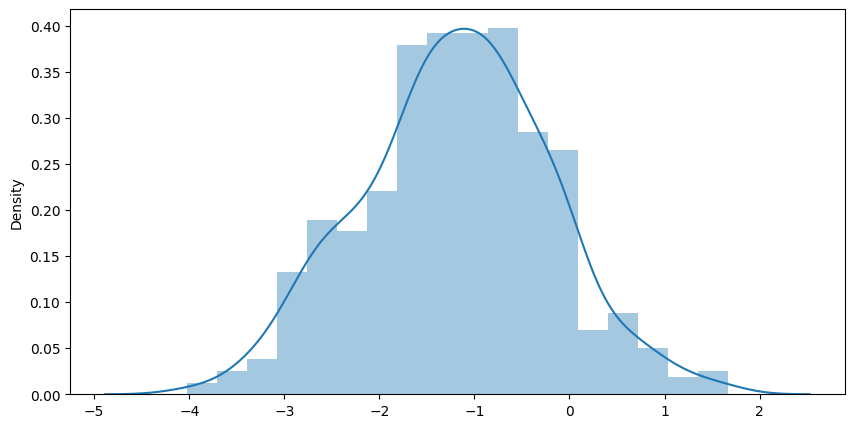

In [ ]:
sns.distplot(residual, kde=True)

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 0.07892981267498214
Root Mean Squared Error: 0.2809445010584513


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  0.24262543000039993


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  0.1142949540554303


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)
Ko
#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  0.09646543362782589


In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 0.07892981267498214,
    "Descison Tree": 0.24262543000039993,
    "Random Forest":  0.1142949540554303,
    "Gradient Boosting":  0.09646543362782589
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
print("With both features and Target variable scaling")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
With both features and Target variable scaling
1. Linear Regression: 0.07892981267498214
2. Gradient Boosting: 0.09646543362782589
3. Random Forest: 0.1142949540554303
4. Descison Tree: 0.24262543000039993
